In [1]:
!pip install numpy
!pip install opencv-python
!pip install tqdm
!pip install tensorflow
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install opencv-python
import pandas as pd
#math operations
import numpy as np
#machine learning
import cv2                     
import os                  
from random import shuffle
from tqdm import tqdm  
import random
#for opening and loading image
from PIL import Image
#for preprocessing
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#Doing One hot encoding as classifier has multiple classes
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from random import shuffle
#For augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#MobileNetV2 model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model, layers
from numpy import loadtxt

import itertools
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# setting path of directory
B_DIR = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Basal_Cell_Carcinoma\\train\\"
M_DIR = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\melanoma\\train\\"
N_DIR = "C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\nevus\\train\\"


# storing all the files from directories PARA_DIR and NORM_DIR to Pimages and Nimages for accessing images directly
Bimages = os.listdir(B_DIR)
Mimages = os.listdir(M_DIR)
Nimages = os.listdir(N_DIR)

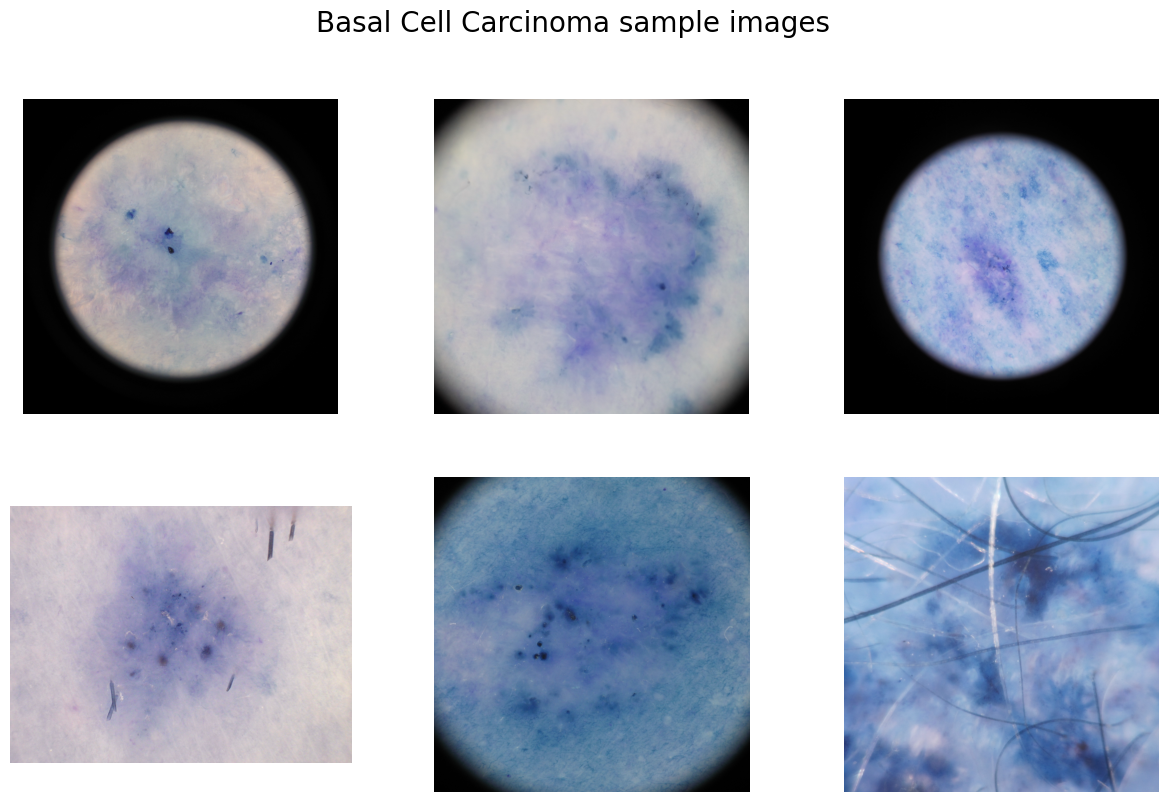

In [4]:
sample_parasite = random.sample(Bimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Basal_Cell_Carcinoma\\train\\" +sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Basal Cell Carcinoma sample images',fontsize=20)
plt.show()

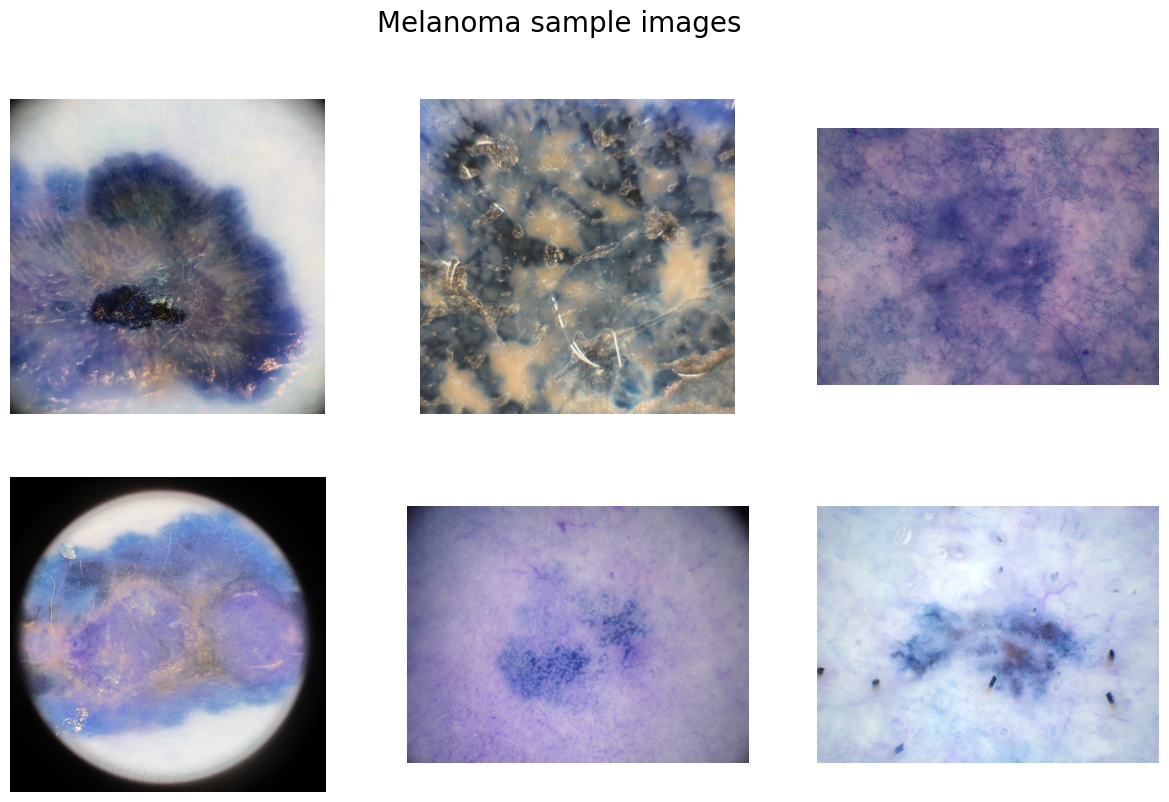

In [5]:
sample_parasite = random.sample(Mimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread(M_DIR +sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Melanoma sample images',fontsize=20)
plt.show()

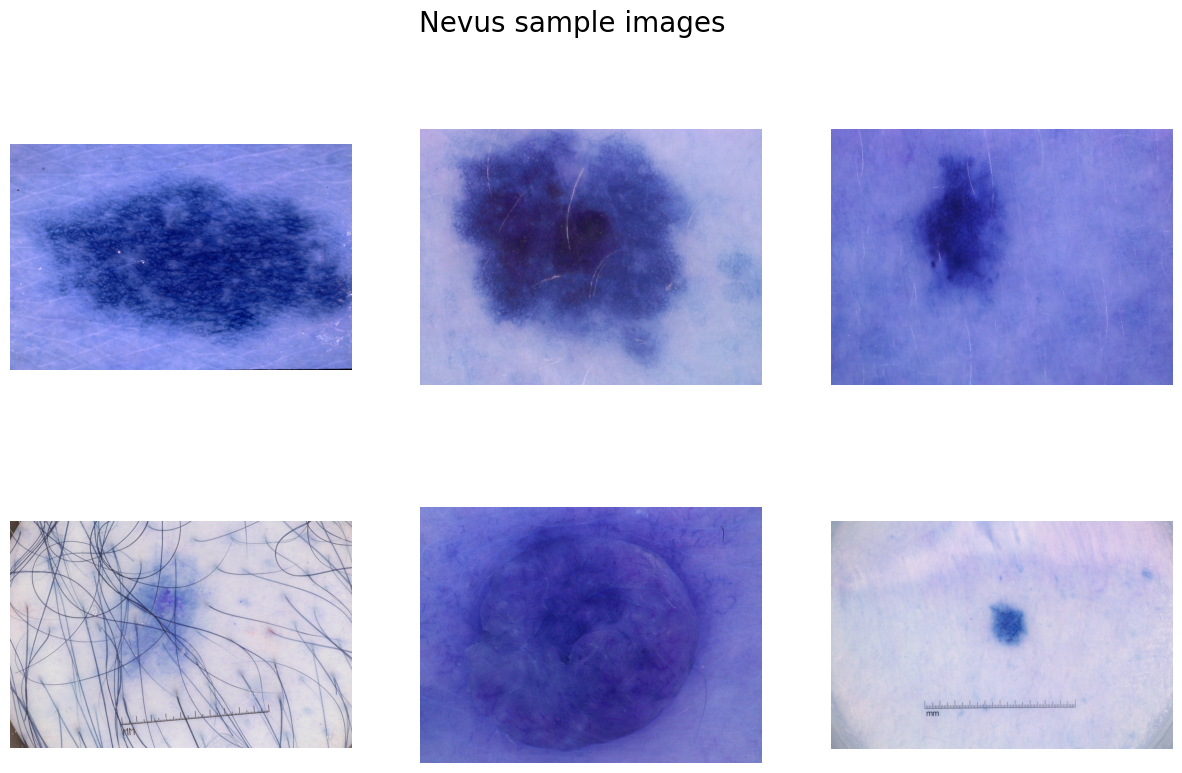

In [6]:
sample_parasite = random.sample(Nimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread(N_DIR +sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Nevus sample images',fontsize=20)
plt.show()

In [ ]:
data=[]
labels=[]
Basal=os.listdir("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Basal_Cell_Carcinoma\\train\\")
for a in Basal:
    try:
        image=cv2.imread("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\Basal_Cell_Carcinoma\\train\\"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Melanoma=os.listdir("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\melanoma\\train\\")
for b in Melanoma:
    try:
        image=cv2.imread("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\melanoma\\train\\"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
Nevus=os.listdir("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\nevus\\train\\")
for c in Nevus:
    try:
        image=cv2.imread("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\nevus\\train\\"+c)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("")


: 

In [ ]:
#converting features and labels in array
feats=np.array(data)
labels=np.array(labels)

# saving features and labels for later re-use
np.save("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\feats_train",feats)
np.save("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\labels_train",labels)

In [ ]:
feats=np.load("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\feats_train.npy")
labels=np.load("C:\\Users\\prera\\Desktop\\preml\\ISIC_2019_Training_Input\\labels_train.npy")

In [ ]:
s=np.arange(feats.shape[0])
np.random.shuffle(s)
feats=feats[s]
labels=labels[s]

In [ ]:
num_classes=len(np.unique(labels))
len_data=len(feats)
print(len_data)